In [55]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import movie_reviews, stopwords

# Downloading the movie_reviews dataset and stopwords from NLTK
nltk.download('movie_reviews')
nltk.download('stopwords')

# Preparing the dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Converting the list of words to a single string for each review
reviews = [' '.join(words) for words, sentiment in documents]
sentiments = [sentiment for words, sentiment in documents]

# Creating a DataFrame
data = pd.DataFrame({'review': reviews, 'sentiment': sentiments})
data.head()

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard ' s quick movie review damn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' first...",neg
4,synopsis : a mentally unstable man undergoing ...,neg


In [56]:
import string

# Function to preprocess the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply preprocessing to each review
data['processed_review'] = data['review'].apply(preprocess_text)
data[['review', 'processed_review']].head()

,review,processed_review
0,"plot : two teen couples go to a church party ,...",plot two teen couples go church party drink dr...
1,the happy bastard ' s quick movie review damn ...,happy bastard quick movie review damn y2k bug ...
2,it is movies like these that make a jaded movi...,movies like make jaded movie viewer thankful i...
3,""" quest for camelot "" is warner bros . ' first...",quest camelot warner bros first feature length...
4,synopsis : a mentally unstable man undergoing ...,synopsis mentally unstable man undergoing psyc...


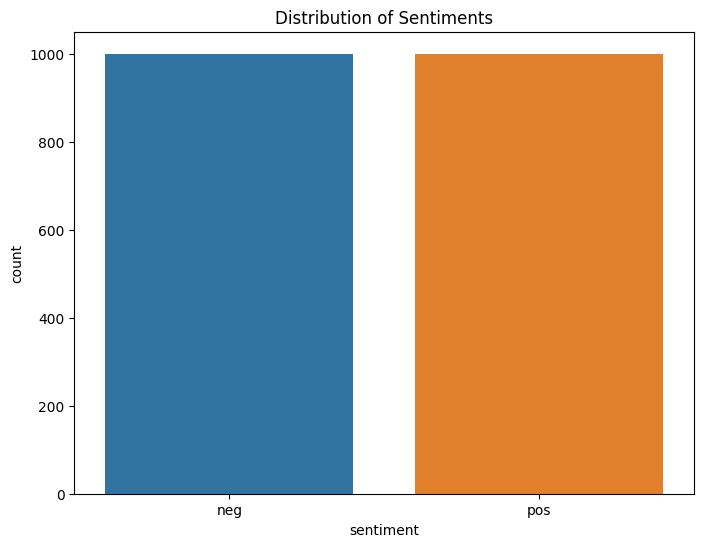

In [57]:
# Visualizing the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sentiment')
plt.title('Distribution of Sentiments')
plt.show()

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorizing the text data
vectorizer = TfidfVectorizer(max_features=5000)
review = data['review']
X = vectorizer.fit_transform(data['processed_review'])
y = data['sentiment'].map({'pos': 1, 'neg': 0})

y = data['sentiment'].map({'pos': 1, 'neg': 0})

# Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test, review_train, review_test = train_test_split(X, y, review, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test, review_train, review_test = train_test_split(X, y, review, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, review_train.shape, review_test.shape

((1600, 5000), (400, 5000), (1600,), (400,), (1600,), (400,))

In [59]:
# Correctly mapping the sentiments to numerical values
from sklearn.linear_model import LogisticRegression

# Correctly mapping the sentiments to numerical values
from sklearn.metrics import accuracy_score

# Building the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predicting the sentiments for the testing data
y_pred = model.predict(X_test)

# Computing the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8375

[1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0
 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0
 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1
 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1]


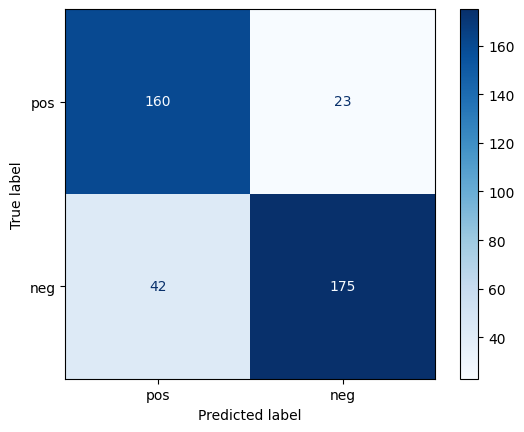

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(y_pred)

# Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# Displaying the confusion matrix with custom labels
labels = ['pos', 'neg']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(cmap='Blues')

In [61]:
import numpy as np

# Randomly selecting two samples from X_test
random_indices = np.random.choice(X_test.shape[0], 5, replace=False)
sample_review_test = review_test.iloc[random_indices].values
sample_X_test = X_test[random_indices]
sample_y_test = y_test.iloc[random_indices].values

# Making predictions using the trained model
predicted_sentiments = model.predict(sample_X_test)

# Creating a DataFrame to display the results
results = pd.DataFrame({'Review': sample_review_test,
                        'Actual Sentiment': sample_y_test,
                       'Predicted Sentiment': predicted_sentiments})

results['Actual Sentiment'] = results['Actual Sentiment'].map({1: 'pos', 0: 'neg'})
results['Predicted Sentiment'] = results['Predicted Sentiment'].map({1: 'pos', 0: 'neg'})
results

,Review,Actual Sentiment,Predicted Sentiment
0,"titantic , writer and director james cameron '...",pos,pos
1,' lake placid ' is definately not your typical...,pos,pos
2,"the sequel to the fugitive ( 1993 ) , u . s ma...",neg,neg
3,well i ' ll be damned . . . the canadians can ...,pos,pos
4,this is one of the most funny and entertaining...,pos,pos
